In [0]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [0]:


#read CSV
df_control = pd.read_csv('https://static-content.springer.com/esm/art%3A10.1186%2F1476-072X-10-29/MediaObjects/12942_2011_429_MOESM1_ESM.TXT', sep= '\t', header=None)
df_cases = pd.read_csv('https://static-content.springer.com/esm/art%3A10.1186%2F1476-072X-10-29/MediaObjects/12942_2011_429_MOESM2_ESM.TXT' , sep = '\t',header=None)


  


In [0]:
##################################data pre-processing#############################
df_control.columns = ['id','x','y']
df_control.set_index('id', inplace=True)

df_cases.columns = ['id','x','y','label','date']
df_cases.set_index('id', inplace=True)
df_cases.date = pd.to_datetime(df_cases.date,format="%d-%b-%y")

#for frist analysis let's remove date and label columns
df_cases_short = df_cases.copy()
df_cases_short.drop(columns=['label','date'], inplace=True)
##############################end of data pre-processing##########################

In [0]:
#calculate distance between points
dist = distance_matrix(df_cases_short, df_cases_short)
dist = pd.DataFrame(dist)

#remove zeros from dist dataframe
dist= dist[dist!=0]

#calculate variance
vet_var = np.arange(df_cases.shape[0])
vet_idx = []
for i in range(df_cases.shape[0]):
    index = np.where(np.isclose(dist[i] ,dist[i].min()))
    #print(index)
    #print(dist[index[0][0]][i])
    #vet_idx[index[0][0]].append(dist[index[0][0]][i])
    vet_idx.append(dist[index[0][0]][i])




In [0]:
#display predicted scores by the model as a contour plot
x = np.linspace(0,700,1000,endpoint=False)
y = np.linspace(0, 750,1000,endpoint=False)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T

In [0]:
df_cases_short.loc[1]

x    355
y     58
Name: 1, dtype: int64

In [0]:

#creating components
components = []
for i in range(df_cases.shape[0]):  
    components.append(multivariate_normal.pdf(XX, mean=(df_cases_short.loc[i+1].to_numpy()), cov=540))
    components[i] = components[i].reshape(X.shape)

#adding components    
summation = np.zeros((1000,1000))
for i in range(df_cases.shape[0]):   
    summation = summation + components[i]
    
#normalize summation
s_max = np.max(summation)
s_min = np.min(summation)
s_norm = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        s_norm[i][j] = (1-0)*(summation[i][j]-s_min)/(s_max - s_min)+0 

Text(0.5, 1.0, 'Gaussian Mixture Model')

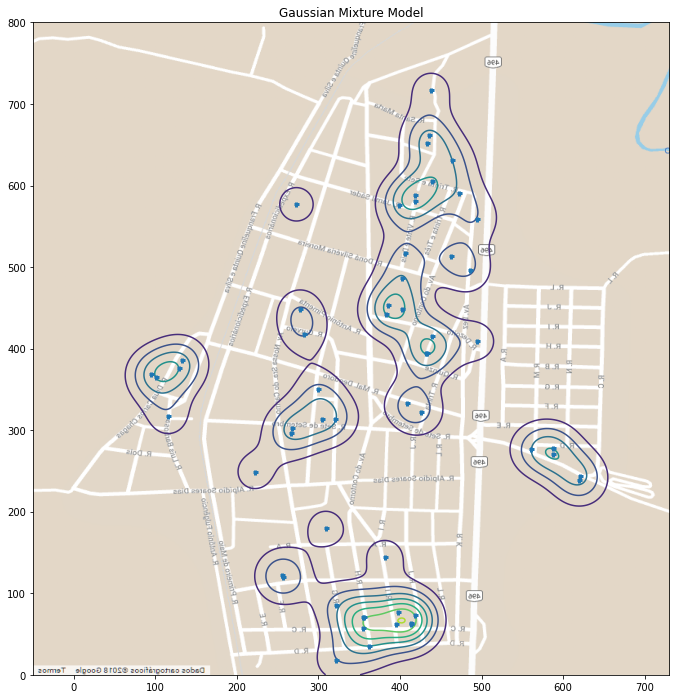

In [0]:
figure = plt.figure(figsize = (14,12))
ax = plt.axes()
img = plt.imread("mapflip.png")

ax.imshow(img, extent=[-50, 730, 0, 800])


ax.plot(df_cases_short.x,df_cases_short.y,'+', markersize=5, mew=3,)
ax.contour(X, Y, summation)
#plt.savefig('books_read.png')
plt.title('Gaussian Mixture Model')
